<h1 style="font-size:3vw; font:bold 3vw Poppins, sans-serif; background-image:linear-gradient(60deg, #003973, #E5E5BE,#003973);
 -webkit-background-clip: text;
 -webkit-text-fill-color: transparent;
 "> Training and evaluation of 4 different model architectures</h1> 

# Import necessary modules and packages

In [5]:
import torchvision.transforms as tt
import torch
import torch.optim as optim
import torch.nn as nn
from train import Training	
from DeepEmotion import DeepEmotion
from DACL import *
from BasicNet import BasicNet
from DAN import *
torch.cuda.empty_cache()
%matplotlib inline

# DeepEmotion architecture with FERG database

In [5]:
batchsize = 128
epochs = 100
lr = 0.005
train_transform =val_transform= tt.Compose([tt.Resize((48,48)),tt.Grayscale(num_output_channels=1),tt.ToTensor(),tt.Normalize((0.5,),(0.5,))])
model = DeepEmotion()
optimizer= optim.Adam(model.parameters(),lr= lr)
criterions=[nn.CrossEntropyLoss()]
dp_ferg=Training("DeepEmotion_FERG", train_transform,val_transform, batchsize, lr, epochs, model, criterions, [optimizer], scheduler=None)

DeepEmotion_FERG is initialized and ready to train.
66877
tensor(1., dtype=torch.float64)
tensor(0.9999, dtype=torch.float64)


Total number of train images: 45151


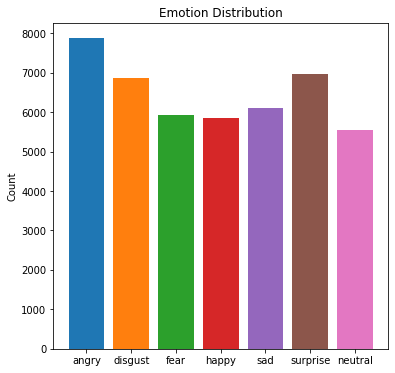

In [4]:
dp_ferg.show_emotion_distribution()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


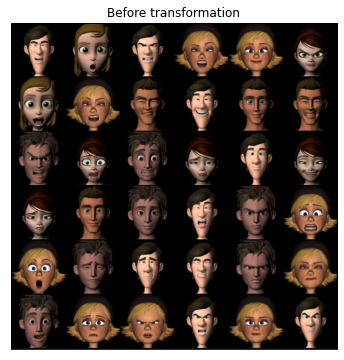

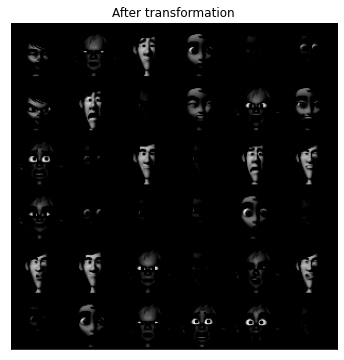

In [5]:
dp_ferg.show_transform_impact()

In [ ]:
dp_ferg.train()

===================================Start DeepEmotion_FERG training===================================


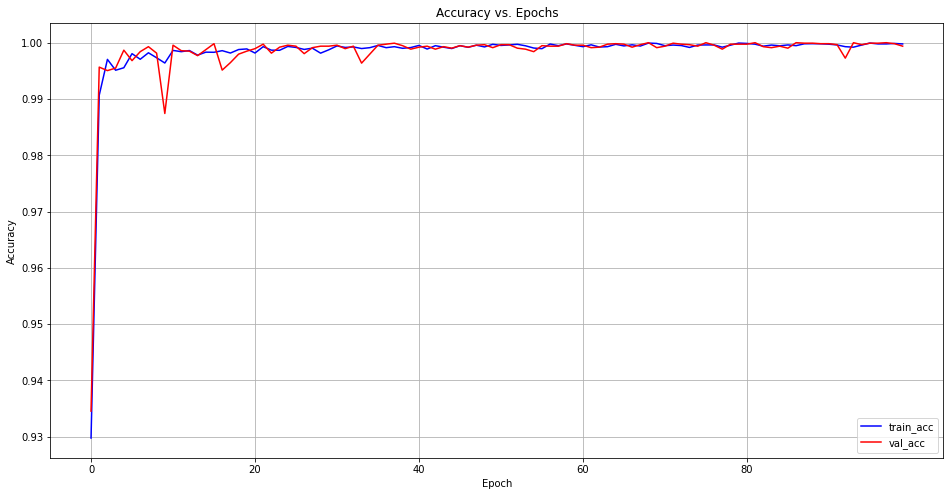

In [6]:
dp_ferg.plot_accuracies()

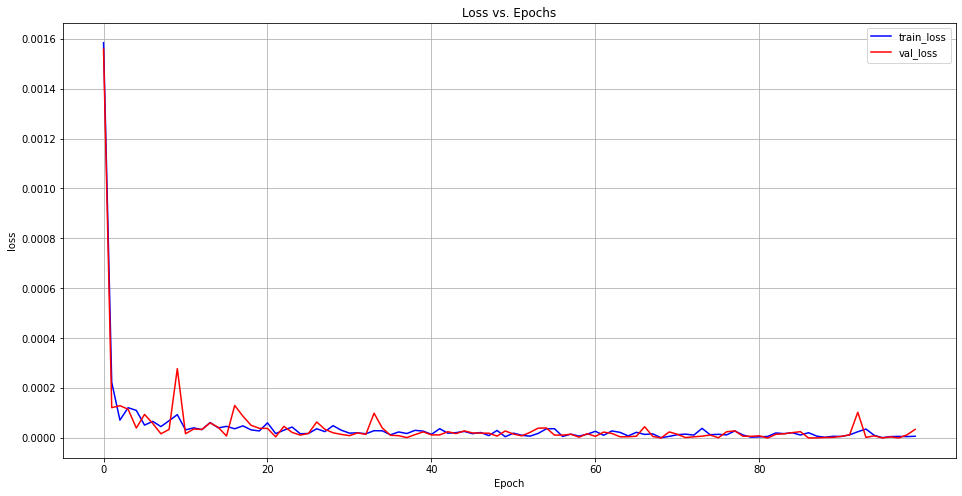

In [7]:
dp_ferg.plot_losses()

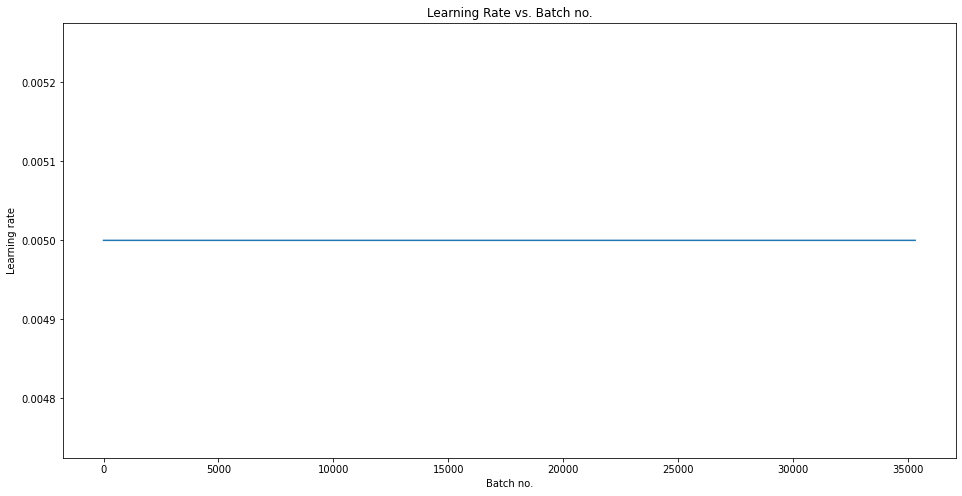

In [8]:
dp_ferg.plot_lrs()

Accuracy of the network on the 213 test images: 17 %
Accuracy for class: Angry is 3.3 %
Accuracy for class: Disgust is 65.5 %
Accuracy for class: Fear  is 3.1 %
Accuracy for class: Happy is 38.7 %
Accuracy for class: Sad   is 10.0 %
Accuracy for class: Surprise is 0.0 %
Accuracy for class: Neutral is 3.3 %


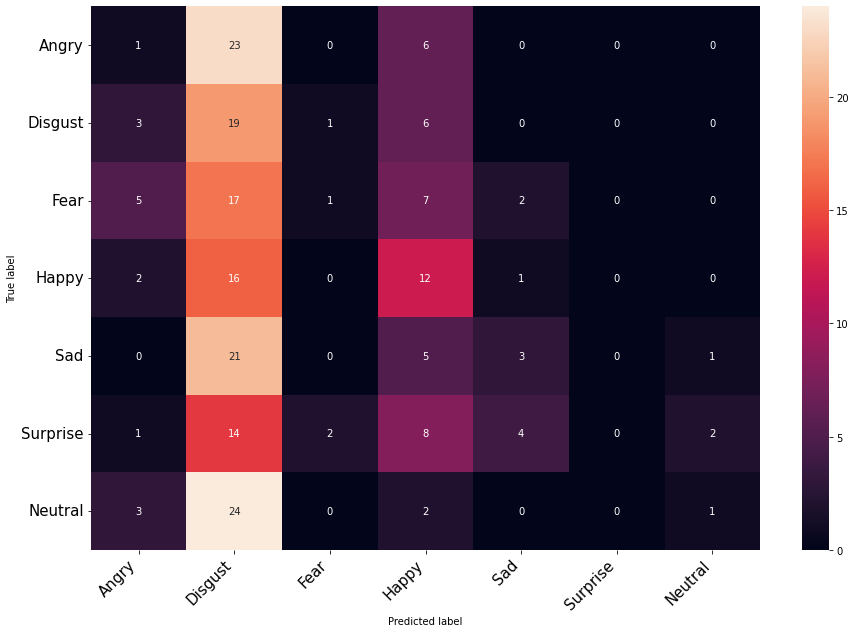

In [13]:
dp_ferg.test_jaffe()

Accuracy of the network on the 35886 test images: 14 %
Accuracy for class: Angry is 7.5 %
Accuracy for class: Disgust is 43.0 %
Accuracy for class: Fear  is 3.8 %
Accuracy for class: Happy is 35.4 %
Accuracy for class: Sad   is 6.0 %
Accuracy for class: Surprise is 7.5 %
Accuracy for class: Neutral is 5.5 %


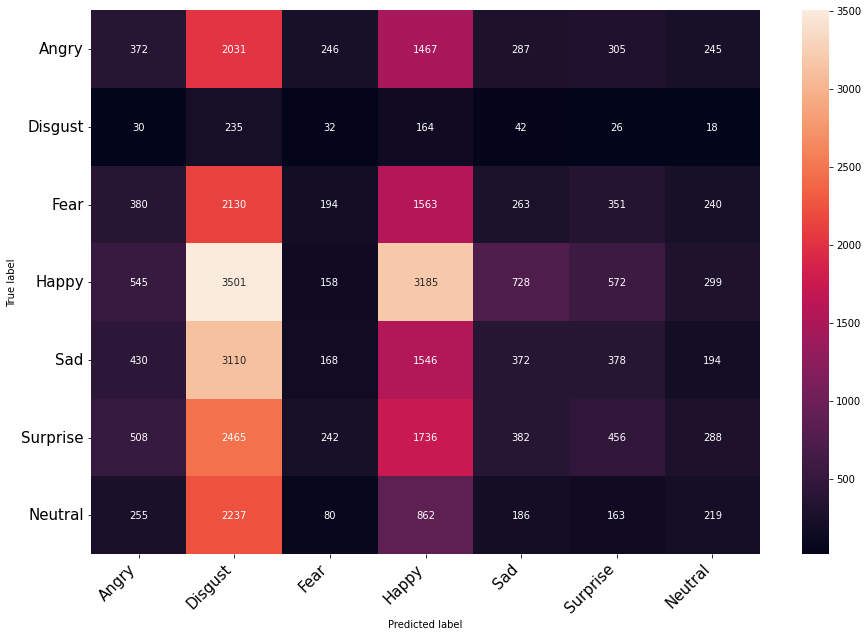

In [19]:
dp_ferg.test_fer2013()

# DAN (Distract Your Attention) architecture with RAF database

In [2]:
device = torch.device("cuda:0")
batchsize =256
lr=0.1
epochs=40
train_transform = tt.Compose([
        tt.Resize((224, 224)),
        tt.RandomHorizontalFlip(),
        tt.RandomApply([
                tt.RandomRotation(20),
                tt.RandomCrop(224, padding=32)
            ], p=0.2),
        tt.ToTensor(),
        tt.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225]),
        tt.RandomErasing(scale=(0.02,0.25)),
        ])
val_transform= tt.Compose([
        tt.Resize((224, 224)),
        tt.ToTensor(),
        tt.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])]) 
model=DAN()
criterion_cls = torch.nn.CrossEntropyLoss().to(device)
criterion_af = AffinityLoss(device)
criterion_pt = PartitionLoss()
criterions=[criterion_cls, criterion_af, criterion_pt]
optimizer = torch.optim.Adam(list(model.parameters()) + list(criterion_af.parameters()),lr,weight_decay = 0)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma = 0.6)
dan_raf_from_me=Training("DAN_RAF-DB", train_transform,val_transform, batchsize, lr, epochs, model, criterions, [optimizer], scheduler=scheduler)
dan_raf_from_authors=Training("DAN_RAF-DB", train_transform,val_transform, batchsize, lr, epochs, model, criterions, [optimizer], scheduler=scheduler,version="pth")

DAN_RAF-DB is initialized and ready to train.
DAN_RAF-DB is initialized and ready to train.


Total number of train images: 12269


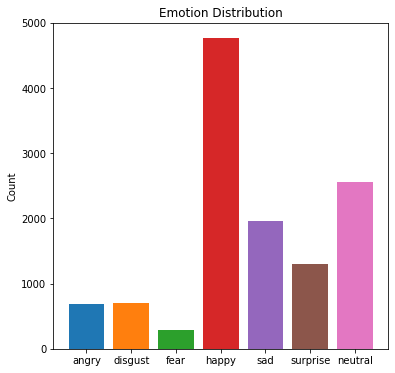

In [12]:
dan_raf_from_me.show_emotion_distribution()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


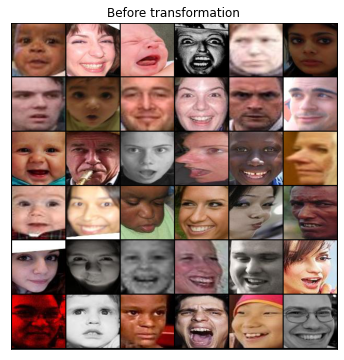

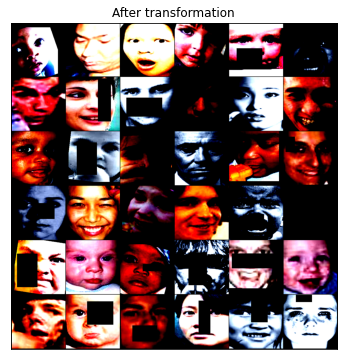

In [13]:
dan_raf_from_me.show_transform_impact()

In [ ]:
dan_raf_from_me.train()

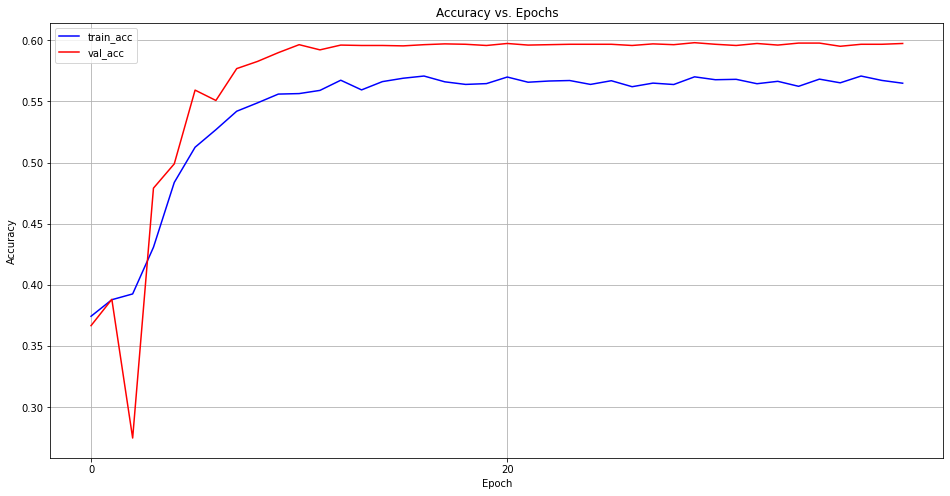

In [14]:
dan_raf_from_me.plot_accuracies()

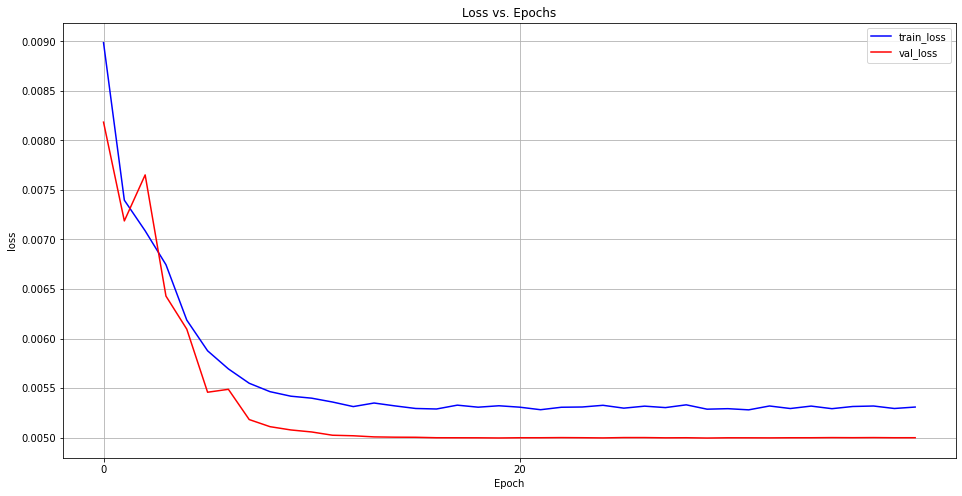

In [15]:
dan_raf_from_me.plot_losses()

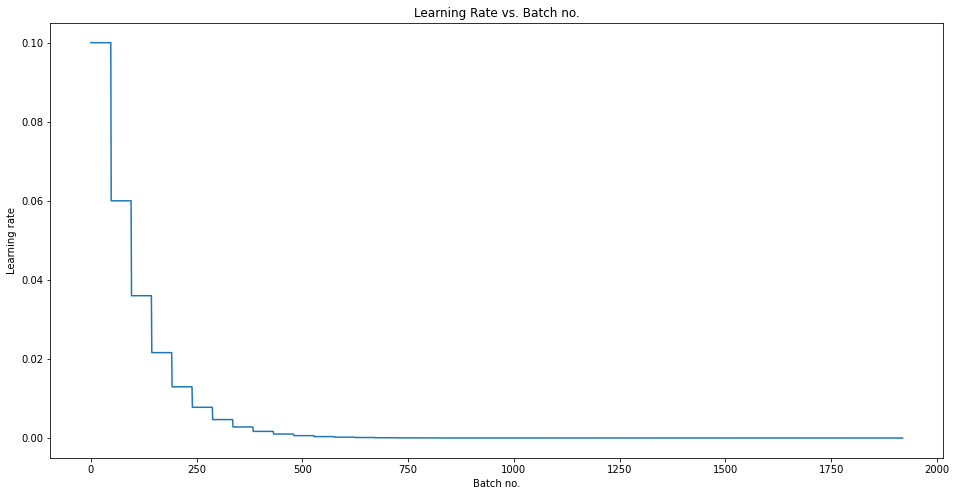

In [16]:
dan_raf_from_me.plot_lrs()

Accuracy on the 213 images from JAFFE: 30 %
Accuracy for class: Angry is 53.3 %
Accuracy for class: Disgust is 0.0 %
Accuracy for class: Fear  is 3.1 %
Accuracy for class: Happy is 45.2 %
Accuracy for class: Sad   is 60.0 %
Accuracy for class: Surprise is 51.6 %
Accuracy for class: Neutral is 0.0 %
Accuracy on the 213 images from JAFFE: 18 %
Accuracy for class: Angry is 0.0 %
Accuracy for class: Disgust is 0.0 %
Accuracy for class: Fear  is 0.0 %
Accuracy for class: Happy is 96.8 %
Accuracy for class: Sad   is 30.0 %
Accuracy for class: Surprise is 0.0 %
Accuracy for class: Neutral is 0.0 %


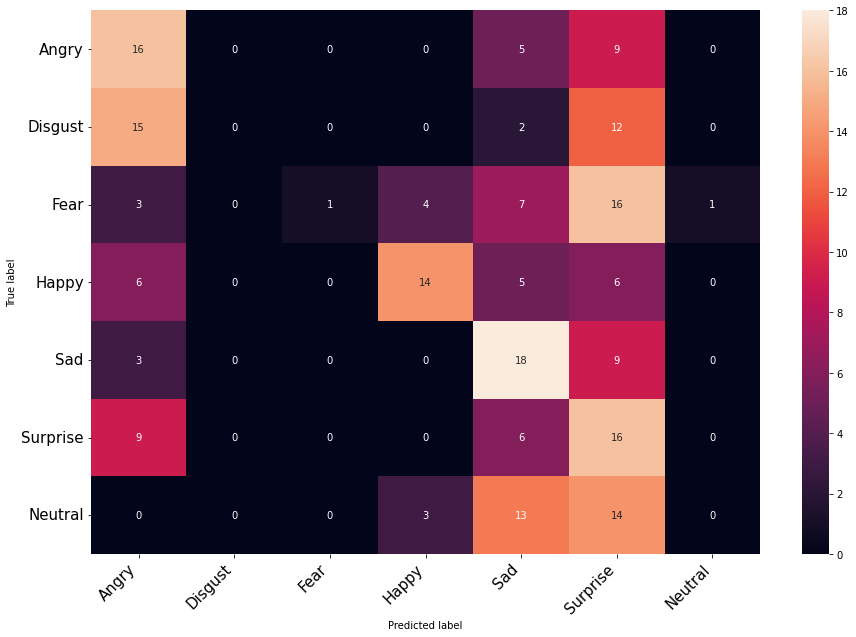

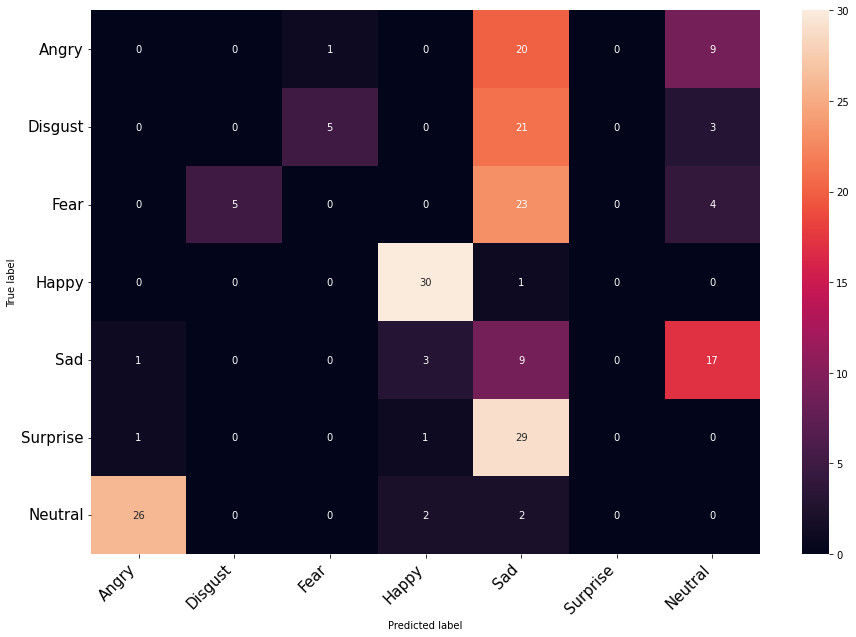

In [14]:
dan_raf_from_me.test_jaffe()
print("================================================")
dan_raf_from_authors.test_jaffe()

Accuracy on the 35886 images from FER2013: 31 %
Accuracy for class: Angry is 9.1 %
Accuracy for class: Disgust is 0.0 %
Accuracy for class: Fear  is 0.6 %
Accuracy for class: Happy is 62.8 %
Accuracy for class: Sad   is 48.4 %
Accuracy for class: Surprise is 29.5 %
Accuracy for class: Neutral is 7.8 %
Accuracy on the 35886 images from FER2013: 26 %
Accuracy for class: Angry is 8.5 %
Accuracy for class: Disgust is 2.9 %
Accuracy for class: Fear  is 5.5 %
Accuracy for class: Happy is 81.9 %
Accuracy for class: Sad   is 13.8 %
Accuracy for class: Surprise is 4.9 %
Accuracy for class: Neutral is 2.9 %


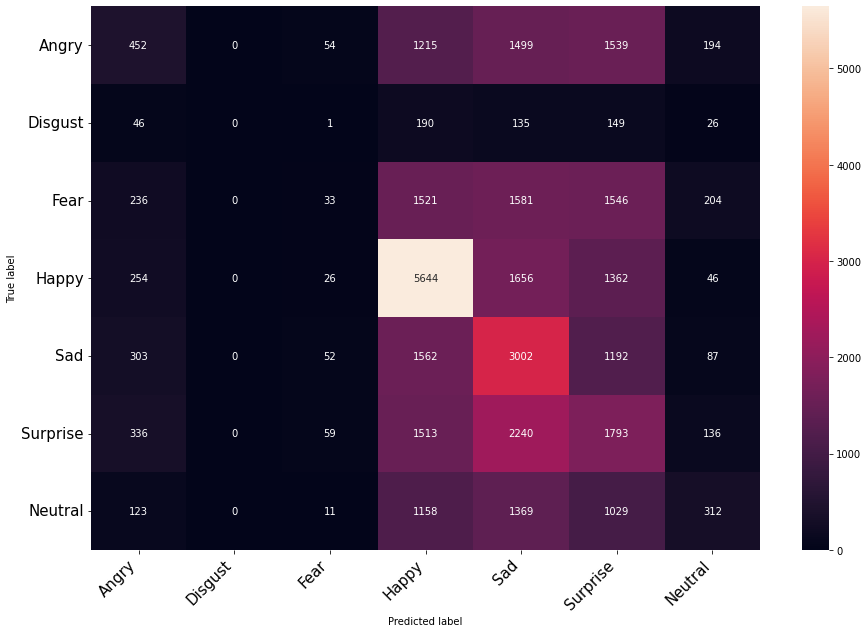

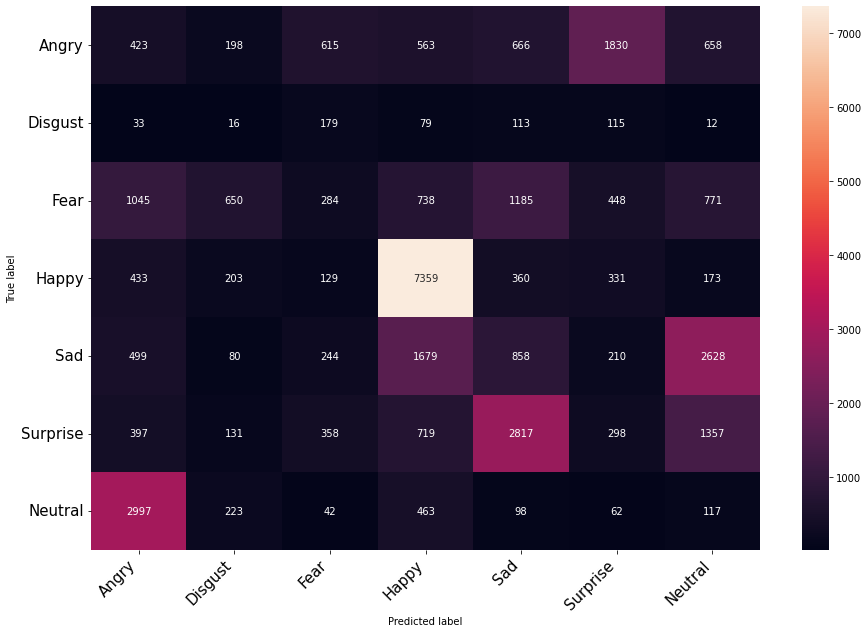

In [3]:
dan_raf_from_me.test_fer2013()
print("================================================")
dan_raf_from_authors.test_fer2013()

# DACL architecture with AffectNet database

In [2]:
batchsize=128
epochs=25
lr=0.01
train_transform =tt.Compose([
            tt.Resize(256),
            RandomFiveCrop(224),
            tt.RandomHorizontalFlip(),
            tt.ToTensor(),
            tt.Normalize(mean=[0.5752, 0.4495, 0.4012],
                                     std=[0.2086, 0.1911, 0.1827])
        ])
val_transform = tt.Compose([
                tt.Resize(256),
                tt.CenterCrop(224),
                tt.ToTensor(),
                tt.Normalize(mean=[0.5752, 0.4495, 0.4012],
                                     std=[0.2086, 0.1911, 0.1827]),
            ])
model = DACL(BasicBlock, [2, 2, 2, 2])
criterion_softmax=nn.CrossEntropyLoss()
criterion_center=SparseCenterLoss(7, 512)
criterions=[criterion_softmax,criterion_center]
optimizer_softmax=torch.optim.SGD(model.parameters(), lr,
                                   momentum=0.9,
                                   weight_decay=0.0005)
optimizer_center=torch.optim.SGD(criterion_center.parameters(), 0.5)
optimizers=[optimizer_softmax,optimizer_center]
scheduler = torch.optim.lr_scheduler.StepLR(optimizer_softmax, step_size=20, gamma=0.1)
dacl_affectnet=Training("DACL_AffectNet",train_transform,val_transform, batchsize, lr, epochs, model, criterions, optimizers, scheduler=scheduler)


DACL_AffectNet is initialized and ready to train.


Total number of train images: 33803


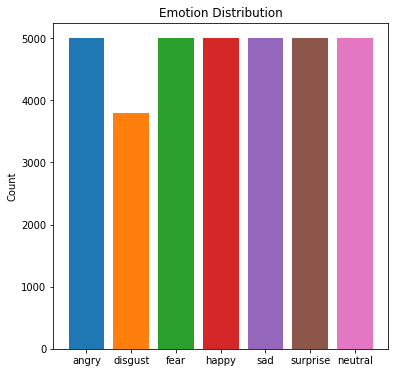

In [21]:
dacl_affectnet.show_emotion_distribution()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


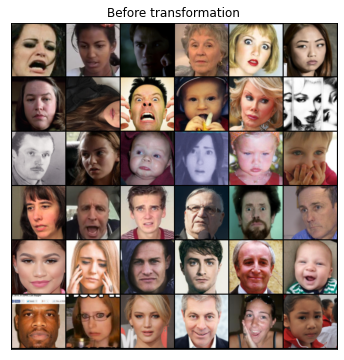

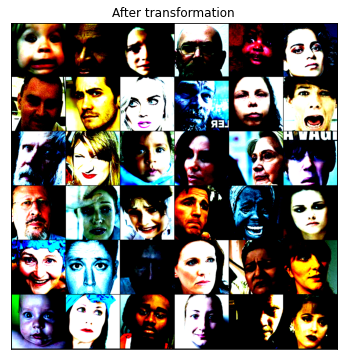

In [22]:
dacl_affectnet.show_transform_impact()

In [ ]:
dacl_affectnet.train()

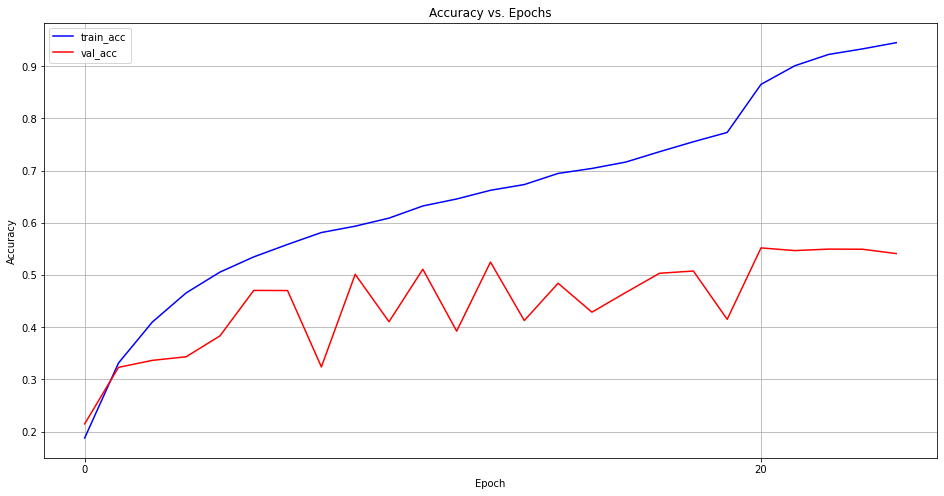

In [4]:
dacl_affectnet.plot_accuracies()

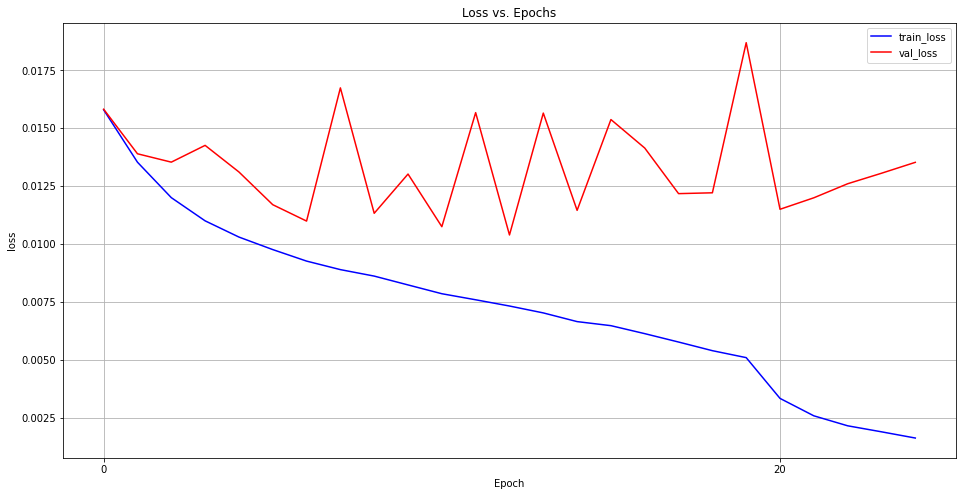

In [5]:
dacl_affectnet.plot_losses()

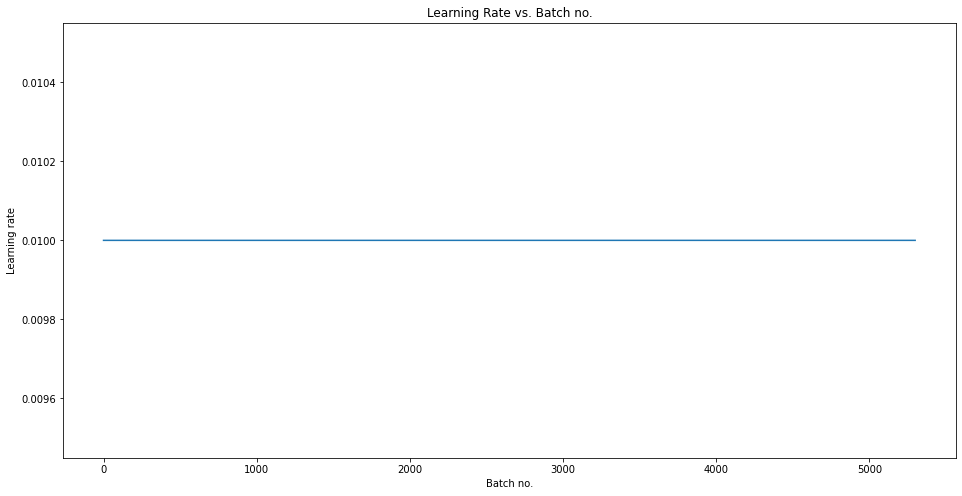

In [25]:
dacl_affectnet.plot_lrs()

Accuracy on the 213 images from JAFFE: 52 %
Accuracy for class: Angry is 13.3 %
Accuracy for class: Disgust is 13.8 %
Accuracy for class: Fear  is 50.0 %
Accuracy for class: Happy is 58.1 %
Accuracy for class: Sad   is 73.3 %
Accuracy for class: Surprise is 87.1 %
Accuracy for class: Neutral is 70.0 %


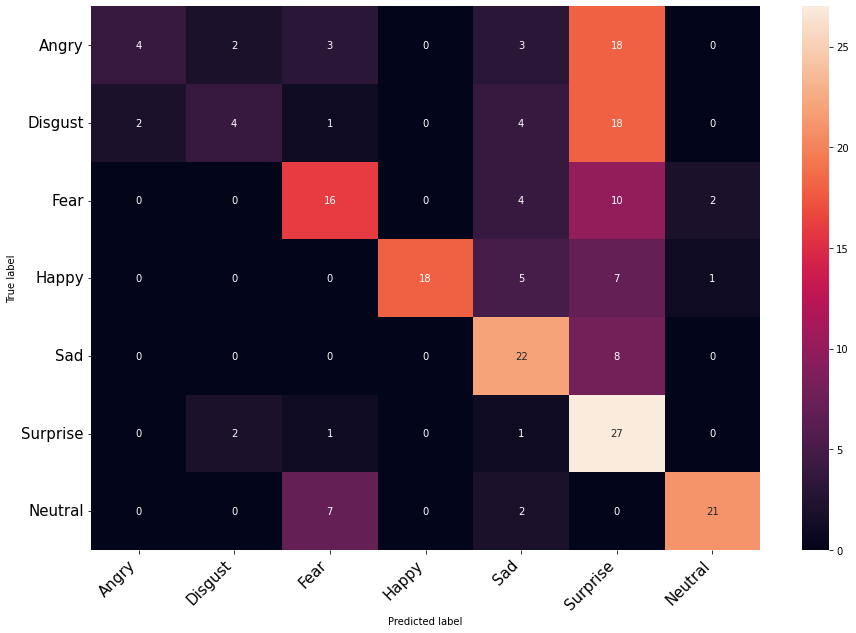

In [6]:
dacl_affectnet.test_jaffe()

Accuracy on the 35886 images from FER2013: 41 %
Accuracy for class: Angry is 34.9 %
Accuracy for class: Disgust is 40.6 %
Accuracy for class: Fear  is 34.3 %
Accuracy for class: Happy is 58.4 %
Accuracy for class: Sad   is 32.2 %
Accuracy for class: Surprise is 42.9 %
Accuracy for class: Neutral is 36.7 %


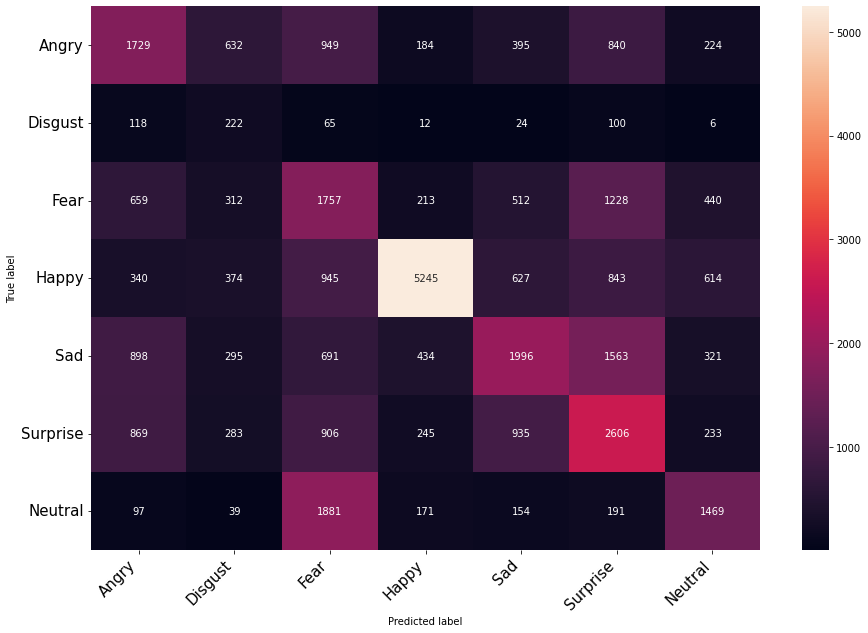

In [9]:
dacl_affectnet.test_fer2013()

# BasicNet architecture with all databases

In [25]:
batchsize=64 #128
epochs=50 #20
lr=0.01 #0.1
model = BasicNet()
train_transform =val_transform= tt.Compose([tt.Resize((256,256)),tt.Grayscale(num_output_channels=1),tt.ToTensor(),tt.Normalize((0.5,),(0.5,))])
optimizer= optim.Adam(model.parameters(),lr= lr)
criterion=nn.CrossEntropyLoss()
basicnet_google=Training("BasicNet_GoogleCC0",train_transform,val_transform, batchsize, lr, epochs, model, [criterion], [optimizer])
    

BasicNet_GoogleCC0 is initialized and ready to train.


In [ ]:
basicnet_google.train()

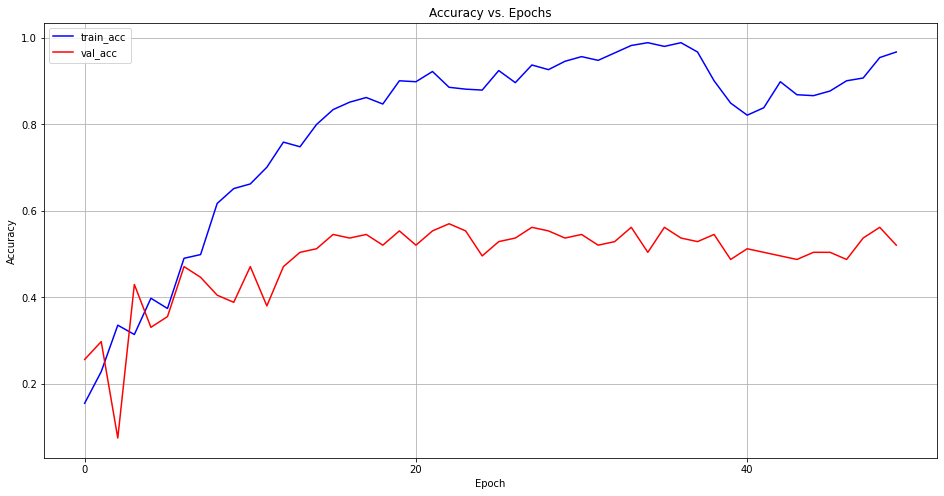

In [31]:
basicnet_google.plot_accuracies()

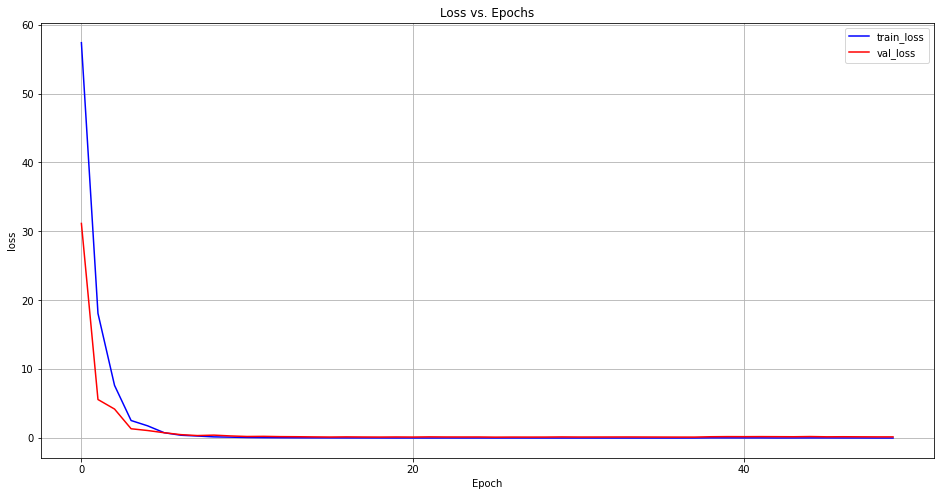

In [32]:
basicnet_google.plot_losses()

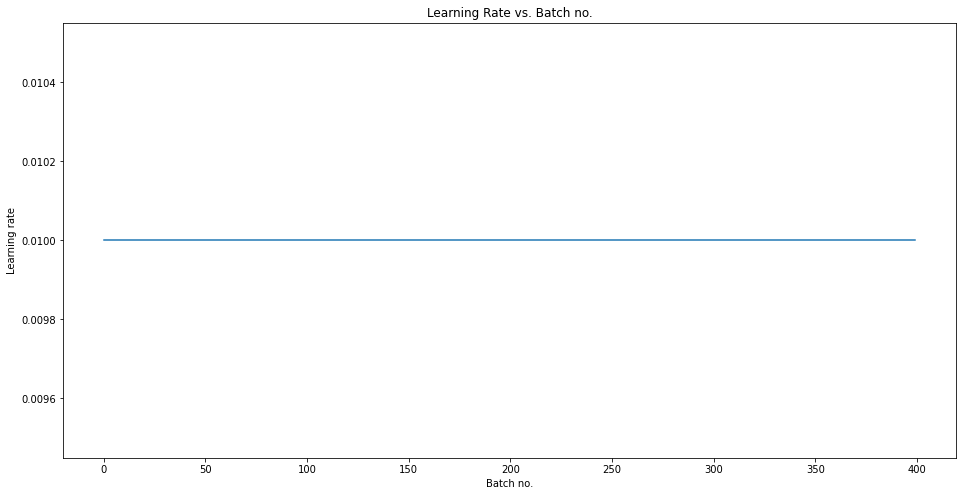

In [33]:
basicnet_google.plot_lrs()

Accuracy of the network on the 213 test images: 24 %
Accuracy for class: Angry is 10.0 %
Accuracy for class: Disgust is 0.0 %
Accuracy for class: Fear  is 15.6 %
Accuracy for class: Happy is 51.6 %
Accuracy for class: Sad   is 10.0 %
Accuracy for class: Surprise is 25.8 %
Accuracy for class: Neutral is 56.7 %


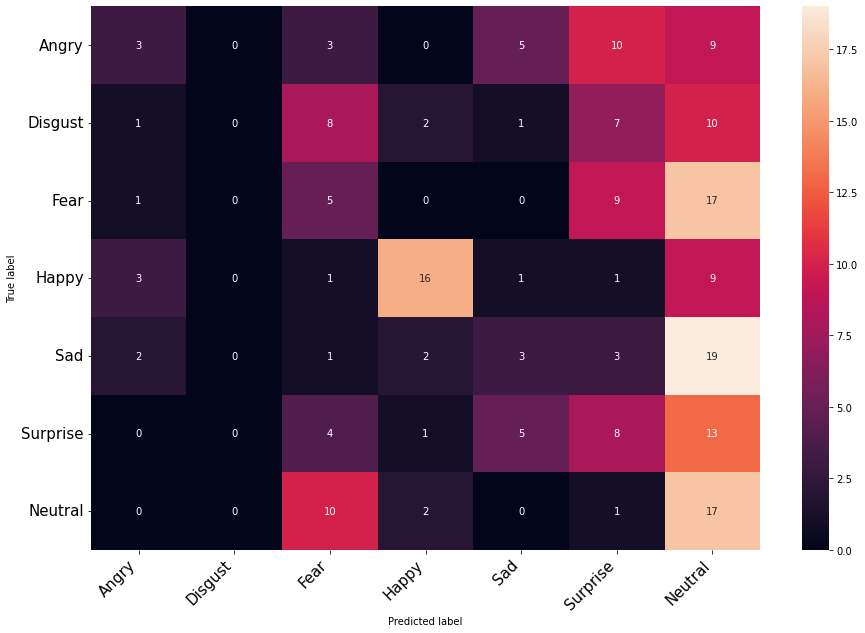

In [5]:
basicnet_google.test_jaffe()

Accuracy of the network on the 35886 test images: 27 %
Accuracy for class: Angry is 15.9 %
Accuracy for class: Disgust is 1.6 %
Accuracy for class: Fear  is 3.3 %
Accuracy for class: Happy is 47.9 %
Accuracy for class: Sad   is 19.1 %
Accuracy for class: Surprise is 27.9 %
Accuracy for class: Neutral is 42.2 %


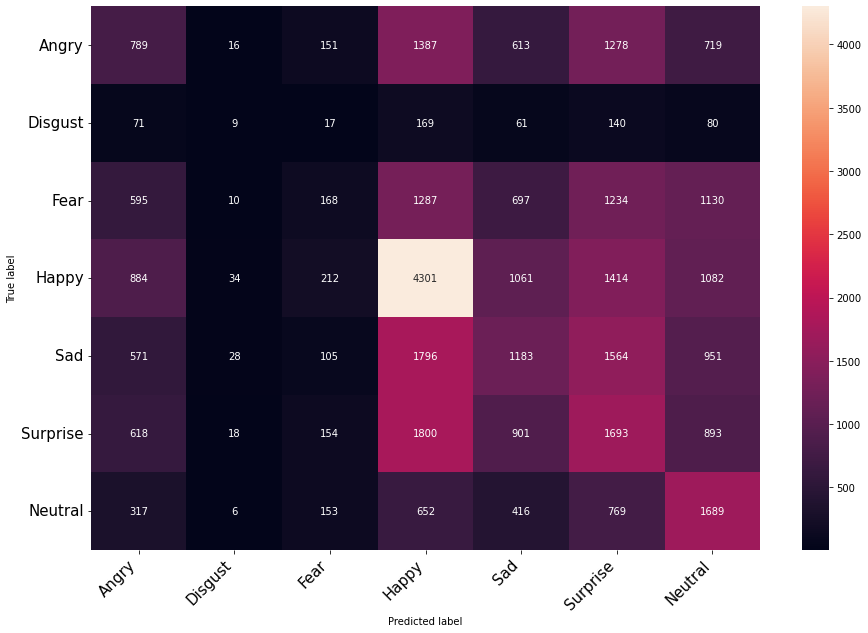

In [6]:
basicnet_google.test_fer2013()